# **Week3授業前課題2 住宅価格の分析**

### 【問題1】データセットの取得

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CSVデータの読み込みと変数への格納
df = pd.read_csv('train.csv')

### 【問題2】データセット自体の調査

エイムズ市の住宅価格データセットは79の説明変数と1つの目的変数から成る。目的変数は「住宅価格」なので、例えば「交通アクセスの良さ」や「屋根のタイプ」など、79の説明変数が、どの程度目的変数に影響を及ぼすかを相関係数行列等を利用して見ていく。

### 【問題3】データの確認

In [5]:
# 各特徴量がどういったものかをみる

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

今回の目的変数はどの列かを確認する。

SalePriceが目的変数

80列目が目的変数

In [6]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
# 文字列データは除かれるので、列数が37columnsになっている

df.iloc[:, :-1].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


### 【問題4】欠損値への対応

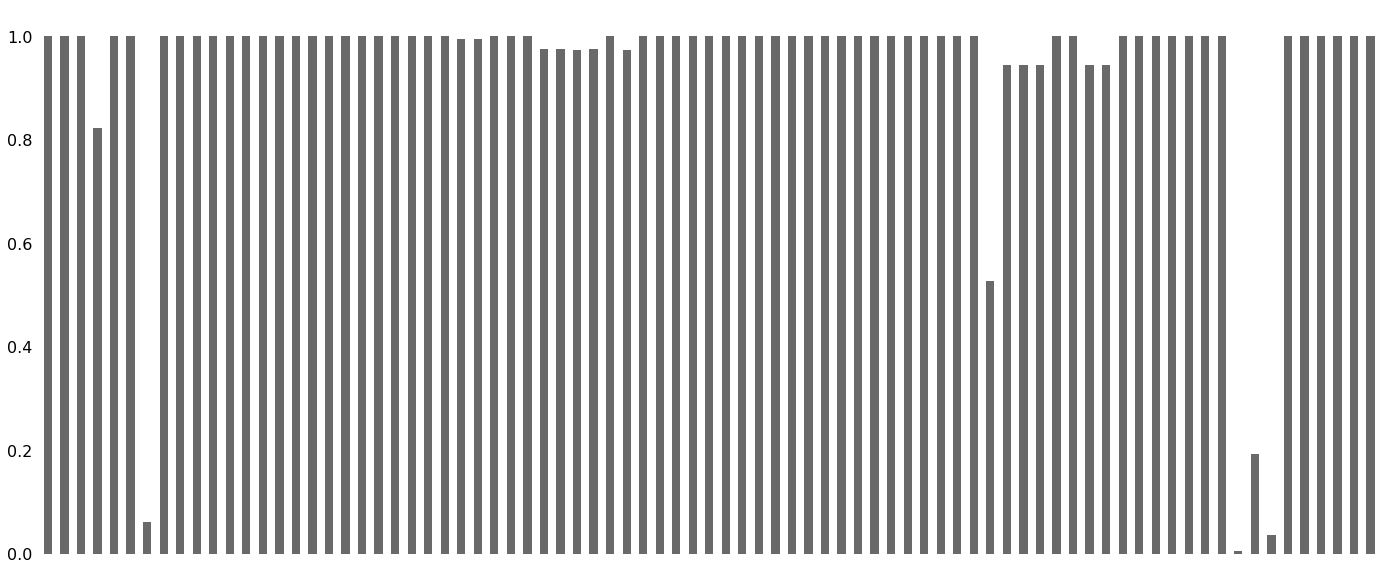

In [7]:
# 各特徴量の欠損値の有無を確認する
# missingnoを利用する

import missingno as msno

msno.bar(df.sample(1460));

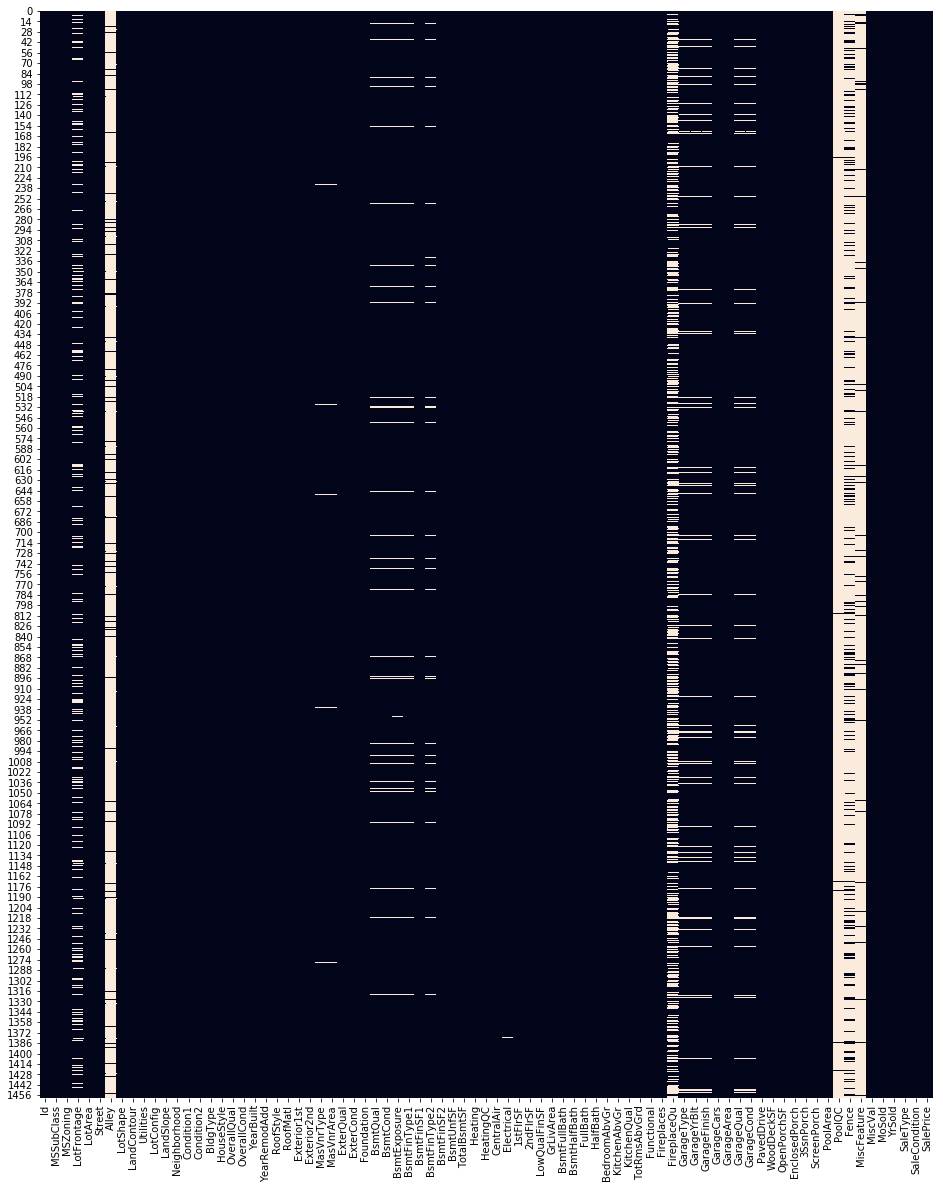

In [8]:
plt.figure(figsize=(16, 20))
sns.heatmap(df.isnull(), cbar=False);

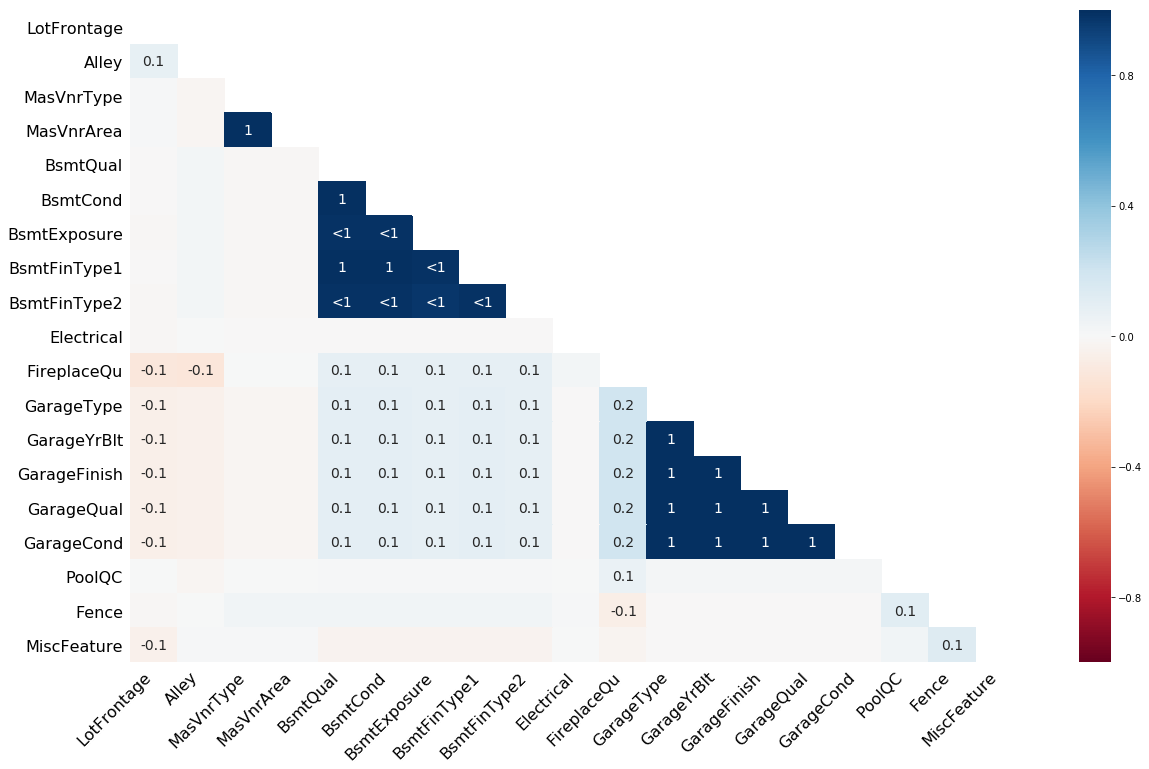

In [9]:
# ヒートマップを出してみる
msno.heatmap(df);

In [10]:
# 欠損値が何パーセント含まれているかを確認する

total = df.isnull().sum().sort_values(ascending=False)
missing_ratio = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, missing_ratio], axis=1, keys=['Total', 'missing ratio'])
missing_df.head(20)

,Total,missing ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [11]:
# 5つ以上欠損値がある特徴量を削除
df = df.drop((missing_df[missing_df['Total'] > 5]).index, 1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [12]:
# 欠損値があるサンプルを削除
df.dropna(how='any', axis=0)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


### 【問題5】用語の調査

・尖度について : 分布が正規分布からどれだけ尖っているかを示す指標（統計量）で、以下の式で表される。

$$ \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^{n} \frac{(x_i - \overline{x})^4}{s^4} - \frac{3(n-1)^2}{(n-2)(n-3)} $$

$$ (\quad x_iの平均値: \overline{x}, \quad 標準偏差: s \quad) $$

　正規分布より尖った分布では上の式が正の値を取り、逆もまた然り。0のときは正規分布に一致する。

・歪度について : 分布が正規分布からどれだけ歪んでいるかを表す指標（統計量）で、以下の式で表される。

$$ \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} (\frac{x_i - \overline{x}}{s})^3 $$

$$ (\quad x_iの平均値: \overline{x}, \quad 標準偏差: s \quad) $$

　分布の左右対称性を示し、上式が正の値をとるときは分布の右裾が長く、逆もまた然り。0の時は正規分布に一致する。

### 【問題6】分布の確認

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


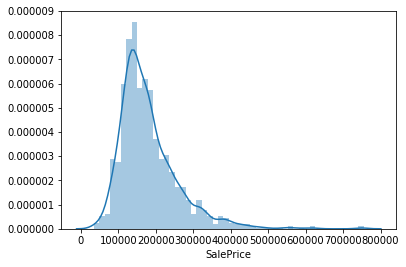

In [13]:
# seabornのsns.distplot()を利用して、目的変数の分布を表示する
sns.distplot(df['SalePrice'], kde=True, rug=False, bins=50);

In [14]:
# 尖度、歪度の算出
y = df.iloc[:, -1]
print('尖度 :', y.kurt())
print('歪度 :', y.skew())

尖度 : 6.536281860064529
歪度 : 1.8828757597682129


In [15]:
# 目的変数に対して対数変換を行う
y_log = y.apply(np.log)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


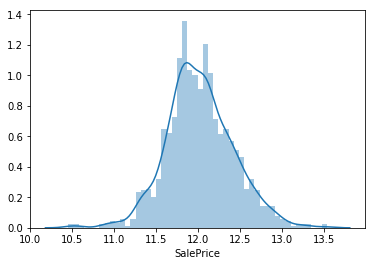

In [16]:
# 対数変換したものに対して分布を表示
sns.distplot(y_log, kde=True, rug=False, bins=50);

In [17]:
# 尖度、歪度の算出
print('尖度 :', y_log.kurt())
print('歪度 :', y_log.skew())

尖度 : 0.8095319958036296
歪度 : 0.12133506220520406


対数変換を施したことにより、分布が正規分布に近いている。つまり分布が平均値付近に集まり（歪度が0に近いていることが数字からもわかる）、尖り具合も緩やかになっている（尖度が変換前の尖度のおよそ63%になっている）。

### 【問題7】相関係数の確認

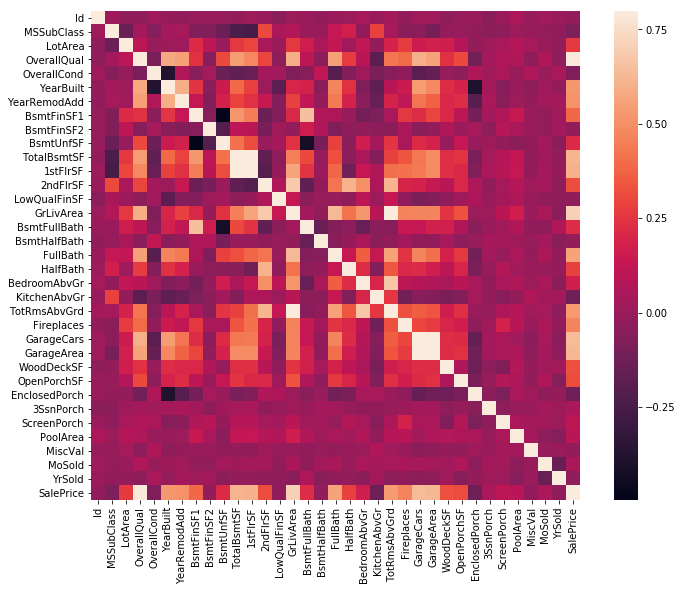

In [18]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

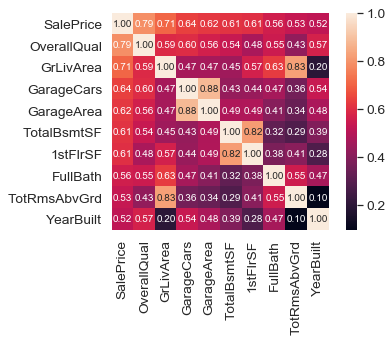

In [20]:
# 目的変数との相関の高い特徴量を10個選び、これだけの相関係数行列ヒートマップを作る

# 上位何個か
k = 10

#目的変数との相関が高いベスト10の特徴量を抽出し、ヒートマップを作成
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)

# 表示
plt.show()

・選んだ10個の特徴量が何を表しているかをまとめる

OverallQual: 家の仕上がり、材料の評価

GrLivArea: リビングの広さ

GarageCars: 車何台分かで見たときの車庫の広さ

GarageArea: 面積で見たときの車庫の広さ

TotalBsmtSF: 敷地内全体の広さ
 
1stFlrSF: 1階部分の面積

FullBath: 風呂場の総数

TotRmsAbvGrd: 合計部屋数（風呂場を除く）

YearBuilt: 築年数

・選んだ10個の特徴量の中でお互いの相関が高い組み合わせを3つ探し出す

ヒートマップから相関の強い組み合わせ順に

**GarageCarsとGarageArea :** 広さを測る尺度の違いはあるにせよ、どちらも車庫の面積を表しているため、高い相関が出るのは当然と言える。

**GrLivAreaとTotRmsAbvGrd :** 合計部屋数の多さもリビングルームの広さも別の要因（例えば、家主の経済力）に由来すると考えられるため、これら2つの特徴量間の関係は疑似相関である可能性が高い。

**TotalBsmtSFと1stFlrSF :** 通常は建物が敷地内の大半を占め、各階の床面積の中で最大なのは構造上1階であることが多いため、この結果は妥当であると言える。